<a href="https://colab.research.google.com/github/jennerospina13/Challenge2_Telecom-X-Datascience/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [94]:
import pandas as pd
import numpy as np

In [95]:
datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [96]:
def flatten_df(df, sep="_"):
    df = df.copy()


    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)


    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break

        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df

In [97]:
df_normalizado = flatten_df(datos)


df_normalizado['account_Charges.Total'] = (
    df_normalizado['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)
df_normalizado.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


#🔧 Transformación

In [113]:
rename_cols = {
    'index': 'INDICE',
    'customerID': 'ID_CLIENTE',
    'Churn': 'CHURN',
    'customer_gender': 'GENERO_CLIENTE',
    'customer_SeniorCitizen': 'CLIENTE_SENIOR',
    'customer_Partner': 'CLIENTE_PARTNER',
    'customer_Dependents': 'CLIENTE_DEPENDIENTE',
    'customer_tenure': 'ANTIGUEDAD_CLIENTE',
    'phone_PhoneService': 'SERVICIO_TELEFONO',
    'phone_MultipleLines': 'MULTIPLES_LINEAS',
    'internet_InternetService': 'TIPO_INTERNET',
    'internet_OnlineSecurity': 'SEGURIDAD_ONLINE',
    'internet_OnlineBackup': 'RESPALDO_ONLINE',
    'internet_DeviceProtection': 'PROTECCION_DISPOSITIVOS',
    'internet_TechSupport': 'SOPORTE_TECNICO',
    'internet_StreamingTV': 'STREAMING',
    'internet_StreamingMovies': 'PELICULAS_STREAMING',
    'account_Contract': 'CONTRATO',
    'account_PaperlessBilling': 'BOLETA_ELECTRONICA',
    'account_PaymentMethod': 'METODO_PAGO',
    'account_Charges.Monthly': 'CARGO_MENSUAL',
    'account_Charges.Total': 'CARGO_TOTAL'
}

In [99]:
df_normalizado.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_normalizado.columns:

    df_normalizado.set_index('INDICE', inplace=True, drop=True)

df_normalizado.to_parquet("telecomx_flat_renombrado.parquet", index=False)
churn_total = df_normalizado['CHURN'].sum()
df_normalizado['CHURN'] = df_normalizado['CHURN'].map({'Yes': 1, 'No': 0})

churn_total = df_normalizado['CHURN'].sum()
churn_total_porcentaje = (churn_total / len(df_normalizado)) * 100

df_normalizado.head()

,ID_CLIENTE,CHURN,GENERO_CLIENTE,CLIENTE_SENIOR,CLIENTE_PARTNER,CLIENTE_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,TIPO_INTERNET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [127]:
df_no_churn = df_normalizado[df_normalizado['CHURN'] == 0]
df_churn = df_normalizado[df_normalizado['CHURN'] == 1]
no_churn_total = len(df_no_churn)
no_churn_pct   = no_churn_total / len(df_normalizado) * 100

nulos_churn = df_normalizado['CHURN'].isna().sum()

df_clean = df_normalizado.dropna(subset=['CHURN'])

total_clean = len(df_clean)
activos_pct = (df_clean['CHURN'] == 0).sum() / total_clean * 100
cancelados_pct = (df_clean['CHURN'] == 1).sum() / total_clean * 100

print(f"Total Filas después de la limpieza: {total_clean}")
print(f"Activos:    {activos_pct:.2f}%")
print(f"Cancelados: {cancelados_pct:.2f}%")
print(f"% total: {(activos_pct + cancelados_pct):.2f}%")
df_no_churn.sample()

Total Filas después de la limpieza: 7043
Activos:    73.46%
Cancelados: 26.54%
% total: 100.00%


,ID_CLIENTE,CHURN,GENERO_CLIENTE,CLIENTE_SENIOR,CLIENTE_PARTNER,CLIENTE_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,TIPO_INTERNET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
886,1248-DYXUB,0.0,Male,0,Yes,Yes,52,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.8,1229.1


#📊 Carga y análisis

In [133]:
import matplotlib.pyplot as plt

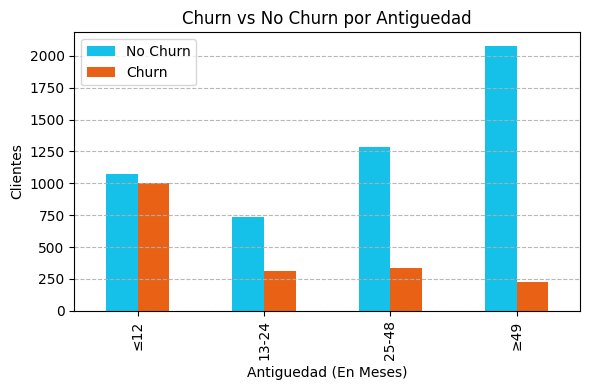

In [134]:
#  -------- Gráfico por Antiguedad --------
df_tmp = df_clean.copy()
bins   = [0, 12, 24, 48, df_tmp['ANTIGUEDAD_CLIENTE'].max() + 1]
labels = ['≤12', '13-24', '25-48', '≥49']

df_tmp.loc[:, 'CATEGORIA_ANTIGUEDAD'] = pd.cut(
    df_tmp['ANTIGUEDAD_CLIENTE'],
    bins=bins, labels=labels, right=False
)

fid_counts = (
    df_tmp
      .groupby(['CATEGORIA_ANTIGUEDAD', 'CHURN'], observed=True)
      .size()
      .unstack(fill_value=0)
)

fid_counts.plot(kind='bar', figsize=(6, 4), color=('#15C1E8', '#E86115'))
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.title('Churn vs No Churn por Antiguedad')
plt.xlabel('Antiguedad (En Meses)')
plt.ylabel('Clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

                      total  retirados pct_churn
CATEGORIA_ANTIGUEDAD                            
≤12                    2069      999.0    48.28%
13-24                  1047      309.0    29.51%
25-48                  1624      339.0    20.87%
≥49                    2303      222.0     9.64%


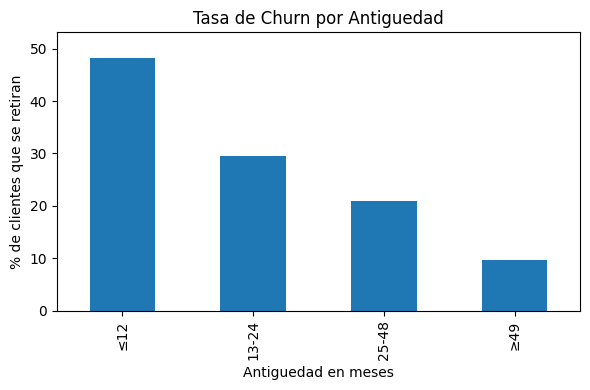

In [135]:
tasa_churn = (
    df_tmp
    .groupby('CATEGORIA_ANTIGUEDAD', observed=True)['CHURN']
    .agg(total='size', retirados='sum')
    .assign(pct_churn=lambda x: (x['retirados'] / x['total'] * 100).round(2))
)

print(tasa_churn[['total', 'retirados', 'pct_churn']].assign(
    pct_churn=lambda x: x['pct_churn'].astype(str) + '%')
)
tasa_churn['pct_churn'].plot(kind='bar', figsize=(6,4))
plt.title('Tasa de Churn por Antiguedad')
plt.ylabel('% de clientes que se retiran')
plt.xlabel('Antiguedad en meses')
plt.ylim(0, tasa_churn['pct_churn'].max() * 1.1)
plt.tight_layout()
plt.show()

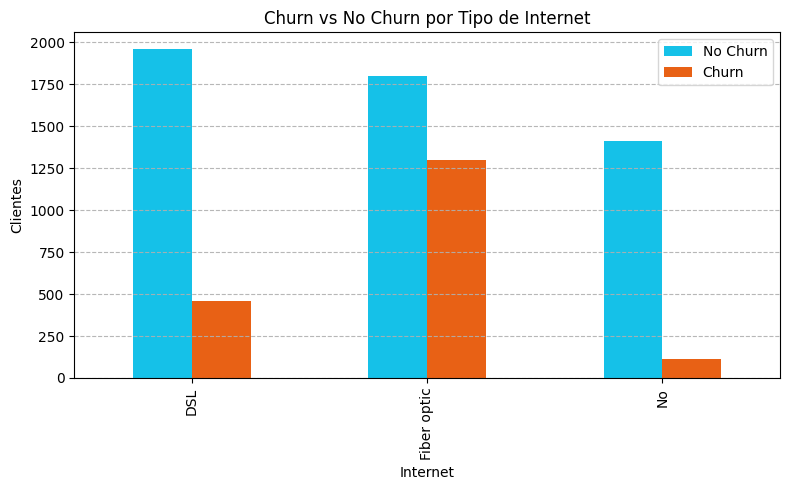

In [136]:
#  -------- Gráfico por Tipo de Internet --------
gender_counts = df_clean.groupby(['TIPO_INTERNET', 'CHURN']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', figsize=(8, 5), color=('#15C1E8', '#E86115'))

plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.title('Churn vs No Churn por Tipo de Internet')
plt.xlabel('Internet')
plt.ylabel('Clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

               total  retirados pct_churn
TIPO_INTERNET                            
DSL             2421      459.0    18.96%
Fiber optic     3096     1297.0    41.89%
No              1526      113.0      7.4%


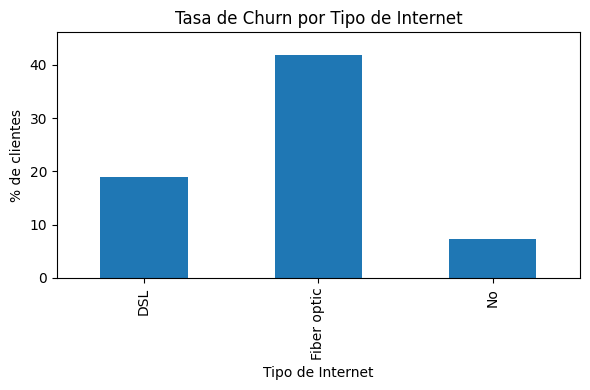

In [137]:
tasa_churn = (
    df_tmp
    .groupby('TIPO_INTERNET', observed=True)['CHURN']
    .agg(total='size', retirados='sum')
    .assign(pct_churn=lambda x: (x['retirados'] / x['total'] * 100).round(2))
)

print(tasa_churn[['total', 'retirados', 'pct_churn']].assign(
    pct_churn=lambda x: x['pct_churn'].astype(str) + '%')
)
tasa_churn['pct_churn'].plot(kind='bar', figsize=(6,4))
plt.title('Tasa de Churn por Tipo de Internet')
plt.ylabel('% de clientes')
plt.xlabel('Tipo de Internet')
plt.ylim(0, tasa_churn['pct_churn'].max() * 1.1)
plt.tight_layout()
plt.show()

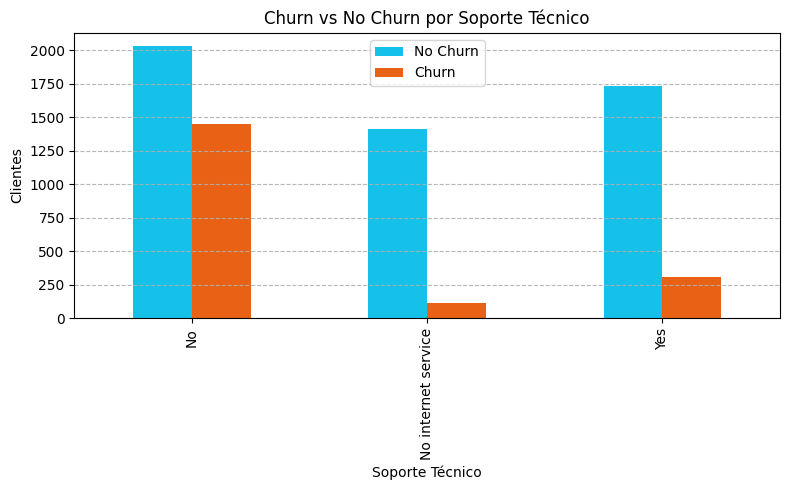

In [138]:
#  -------- Gráfico por Soporte Técnico --------
gender_counts = df_clean.groupby(['SOPORTE_TECNICO', 'CHURN']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', figsize=(8, 5), color=('#15C1E8', '#E86115'))

plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.title('Churn vs No Churn por Soporte Técnico')
plt.xlabel('Soporte Técnico')
plt.ylabel('Clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

                     total  retirados pct_churn
SOPORTE_TECNICO                                
No                    3473     1446.0    41.64%
No internet service   1526      113.0      7.4%
Yes                   2044      310.0    15.17%


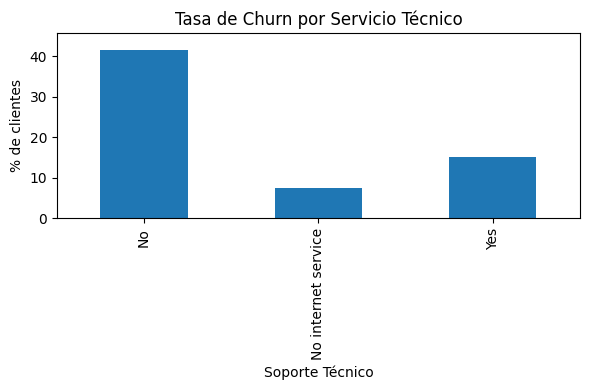

In [139]:
tasa_churn = (
    df_tmp
    .groupby('SOPORTE_TECNICO', observed=True)['CHURN']
    .agg(total='size', retirados='sum')
    .assign(pct_churn=lambda x: (x['retirados'] / x['total'] * 100).round(2))
)

print(tasa_churn[['total', 'retirados', 'pct_churn']].assign(
    pct_churn=lambda x: x['pct_churn'].astype(str) + '%')
)
tasa_churn['pct_churn'].plot(kind='bar', figsize=(6,4))
plt.title('Tasa de Churn por Servicio Técnico')
plt.ylabel('% de clientes')
plt.xlabel('Soporte Técnico')
plt.ylim(0, tasa_churn['pct_churn'].max() * 1.1)
plt.tight_layout()
plt.show()

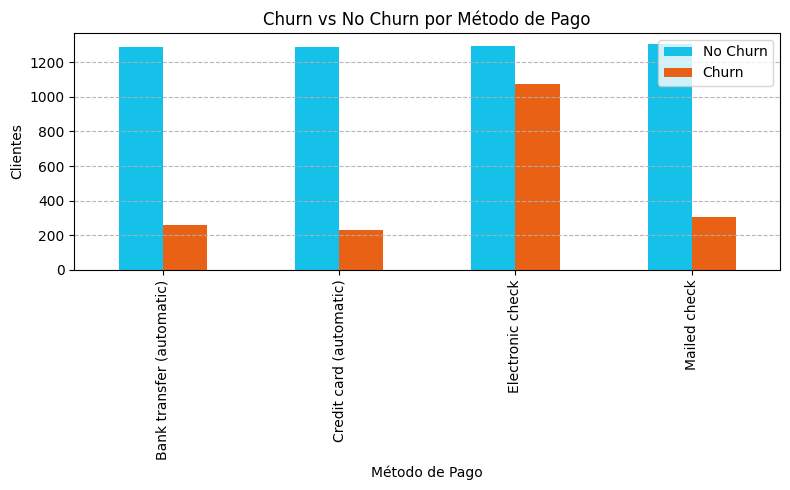

In [140]:
#  -------- Gráfico por Método de Pago --------
gender_counts = df_clean.groupby(['METODO_PAGO', 'CHURN']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', figsize=(8, 5), color=('#15C1E8', '#E86115'))

plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.title('Churn vs No Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Clientes')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

                           total  retirados pct_churn
METODO_PAGO                                          
Bank transfer (automatic)   1544      258.0    16.71%
Credit card (automatic)     1522      232.0    15.24%
Electronic check            2365     1071.0    45.29%
Mailed check                1612      308.0    19.11%


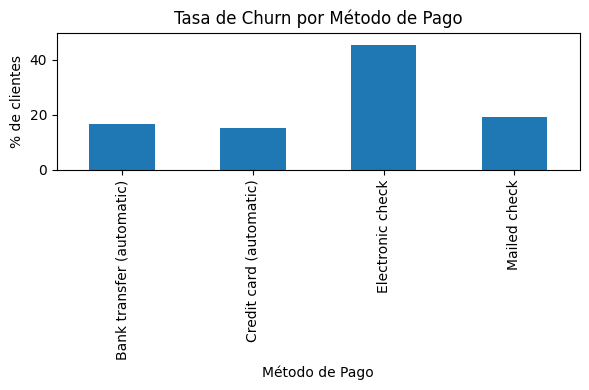

In [141]:
tasa_churn = (
    df_tmp
    .groupby('METODO_PAGO', observed=True)['CHURN']
    .agg(total='size', retirados='sum')
    .assign(pct_churn=lambda x: (x['retirados'] / x['total'] * 100).round(2))
)

print(tasa_churn[['total', 'retirados', 'pct_churn']].assign(
    pct_churn=lambda x: x['pct_churn'].astype(str) + '%')
)
tasa_churn['pct_churn'].plot(kind='bar', figsize=(6,4))
plt.title('Tasa de Churn por Método de Pago')
plt.ylabel('% de clientes')
plt.xlabel('Método de Pago')
plt.ylim(0, tasa_churn['pct_churn'].max() * 1.1)
plt.tight_layout()
plt.show()

#📄Informe final

**ANALISIS EXPLORATORIO DE DATOS**

**Resumen Ejecutivo**

Luego de realizar el análisis de los datos de Telecom X; en donde se puede concluir que aproximadamente el 26.54% de los clientes han dejado los servicios, se encuentran factores asociados a estas pérdidas como lo son los contratos a corto tiempo, el servicio de Fibra Óptica y la facturación electrónica, así mismo se encuentra que los clientes con mayor antigüedad tienen tasas significativamente más bajas de abandono.

A continuación se comparte un resumen general en porcentaje de clientes activos y que se retiraron de la compañía:

Activos:    73.46% //
Cancelados: 26.54% //
% total: 100.00%

**Factor económico**
- Por antigüedad: Se encuentra que los clientes nuevos son mucho más propensos a retirarse de los servicios, puesto que en clientes que no superan los 2 años la tasa de retiro es mayor, encontrándose que:

     1.   En clientes con un tiempo menor a 12 meses se encuentra que el   porcentaje de cancelación es de 48.28%, siendo este un factor clave de deserción, pues es un valor demasiado alto.

     2.   En clientes con un periodo de 25 a 48 meses el porcentaje de retiro es más bajo pero aun así para el total general es el segundo valor más alto, a lo cual se le debe de prestar atención también, para así evitar aumentar deserciones en este segmento.

**Factor Servicio**
- Por Tipo de Internet: En este Segmento se encuentra también una alta tasa de retiro de clientes, encontrándose que:

     1.   Los Clientes con Fibra Óptica lideran la tasa más alta de retiro, llegando al 41.89%, en donde se deben tomar medidas sobre la red.

     2.   En la Red DSL la deserción de clientes esta más baja, lo que se intuye es más estable.

- Por Servicio Técnico: Para este segmento se encuentra una alta incidencia de retiro en aquellos clientes que no cuentan con un soporte técnico, por lo que también influye en que al cliente al no poseer apoyo de un profesional se dé por vencido cuando la red este fallando.

     1.   Los clientes que no cuentan con soporte técnico tienen un porcentaje alto de retiro con el 41.64%, a esta cifra también se le debe prestar atención para evitar que se sigan retirando clientes.
     
     2.   En contraste, solo el 15.17% de los clientes retirados contaban con el servicio de soporte, lo que refuerza que con la ayuda de un técnico los porcentajes se pueden bajar.

- Por método de Pago: el valor critico en este segmento se encuentra en el cheque Electrónico.

     1.   El cheque Electrónico lidera este segmento con un 45.29%, lo que puede estar indicando errores al momento de facturar y a su vez desmejora la experiencia de usuario.

**Recomendaciones Clave**

- Planes de fidelización y contratos a largo plazo, además ofrecer descuentos o beneficios adicionales para clientes que elijan planes de 1 o 2 años.

- Mejoras en la red de Fibra Óptica, Abordar y planear mantenimientos preventivos-correctivos sobre la red de Fibra óptica ya que las fallas sobre estas pueden ser el origen de la alta tasa de cancelación.

- Programa de retención para clientes nuevos, Implementar estrategias específicas para clientes en sus primeros 6 meses.

- Incluir paquetes con servicio de soporte técnico, es notable que con la ayuda de un profesional se reduzca la cancelación de los servicios.

- Optimización en procesos de facturación electrónica, el alto porcentaje de churn en este método de facturación, sugiere malas experiencias de usuario.

